(-5.0, 125.0)

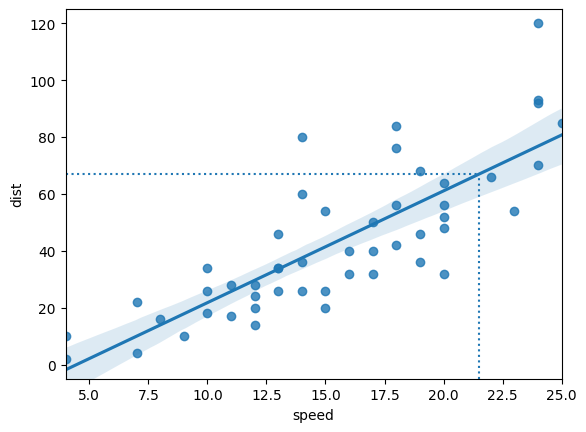

In [ ]:
import seaborn as sns
import statsmodels.api as sm

my_data = sm.datasets.get_rdataset('cars', 'datasets').data
ax = sns.regplot(x='speed', y='dist', data=my_data)
ax.vlines(x=21.5, ymin=-5, ymax=67,   linestyles='dotted')
ax.hlines(y=67,   xmin=4,  xmax=21.5, linestyles='dotted')
ax.set_xlim(4, 25)
ax.set_ylim(-5, 125)

In [ ]:
import statsmodels.api as sm

my_data = sm.datasets.get_rdataset('cars', 'datasets').data
X, y = my_data[['speed']], my_data['dist']


In [ ]:
# モデルの指定
from sklearn.linear_model import LinearRegression
my_model = LinearRegression()

# 訓練(モデルをデータにフィットさせる)
my_model.fit(X, y)


LinearRegression()

In [ ]:
my_model.intercept_, my_model.coef_

(-17.579094890510973, array([3.93240876]))

In [ ]:
tmp = [[21.5]]
my_model.predict(tmp)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([66.96769343])

<Axes: xlabel='speed'>

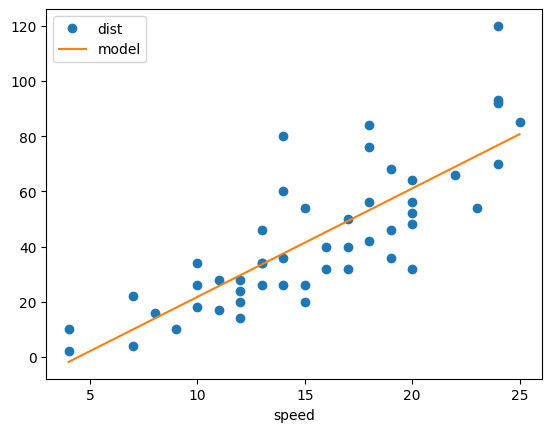

In [ ]:
import numpy as np
import pandas as pd

tmp = pd.DataFrame({'speed': np.linspace(min(my_data.speed),
                                         max(my_data.speed),
                                             100)})
tmp['model'] = my_model.predict(tmp)

pd.concat([my_data, tmp]).plot(x='speed', style=['o','-'])

In [ ]:
# 7.6 検証

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# データの準備
my_data = sm.datasets.get_rdataset('cars','datasets').data
X, y = my_data[['speed']], my_data['dist']

# モデルの指定
my_model = LinearRegression()

# 検証（5分割交差検証）
my_scores = cross_val_score(my_model, X, y, cv=5)

# 5個の決定係数1を得る
my_scores
print('5個の決定係数1:', my_scores)

# 平均を決定係数1(検証)とする
my_scores.mean()
print('決定係数1(検証):', my_scores.mean())

5個の決定係数1: [-0.25789256 -0.21421069 -0.30902773 -0.27346232  0.02312918]
決定係数1(検証): -0.20629282165364665


In [ ]:
# 決定係数1(検証)の代わりに，RMSE(検証)を求める
my_scores = cross_val_score(my_model, X, y, cv=5, scoring='neg_root_mean_squared_error')
-my_scores.mean()

15.58402474583013

In [ ]:
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, LeaveOneOut

my_data = sm.datasets.get_rdataset('cars', 'datasets').data
X, y = my_data[['speed']], my_data['dist']
my_model = LinearRegression().fit(X, y)
y_ = my_model.predict(X)


In [ ]:
# 当てはまりの良さの指標

# RMSE(訓練)
rmse = mean_squared_error(y, y_)**0.5
print('RMSE:', rmse)

# 決定係数1(訓練)
r1 = my_model.score(X, y)
print('決定係数1(訓練):', r1)

# 決定係数６(訓練)
r6 = np.corrcoef(y, y_)[0, 1]**2
print('決定係数6(訓練)', r6)

RMSE: 15.068855995791381
決定係数1(訓練): 0.6510793807582509
決定係数6(訓練) 0.6510793807582511


In [ ]:
# RMSE(検証)
my_scores = cross_val_score(my_model, X, y, 
                            scoring='neg_root_mean_squared_error')
-my_scores.mean()


15.58402474583013

In [ ]:
# 決定係数1(検証)
my_scores = cross_val_score(my_model, X, y, 
                            scoring='r2')
my_scores.mean()

0.20629282165364665

In [ ]:
# 方法1
my_scores1 = cross_val_score(my_model, X, y, cv=LeaveOneOut(),
                            scoring='neg_root_mean_squared_error')
(-my_scores1.mean())**0.5

3.4726328122387895

In [ ]:
# 方法2
my_scores2 = cross_val_score(my_model, X, y, cv=LeaveOneOut(),
                            scoring='neg_root_mean_squared_error')
(my_scores2**2).mean()**0.5

15.6973060093991

In [ ]:
-my_scores2.mean()

12.059178648637483

In [ ]:
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.neighbors import KNeighborsRegressor

my_data = sm.datasets.get_rdataset('cars', 'datasets').data
X, y = my_data[['speed']], my_data['dist']

my_lm_scores = cross_val_score(
    LinearRegression(),
    X, y, cv = LeaveOneOut(),
    scoring = 'neg_root_mean_squared_error'
)

my_knn_scores = cross_val_score(
    KNeighborsRegressor(n_neighbors=5),
    X, y, cv = LeaveOneOut(),
    scoring = 'neg_root_mean_squared_error'
)


In [ ]:
(-my_lm_scores.mean())**0.5

3.4726328122387895

In [ ]:
(-my_knn_scores.mean())**0.5

3.534968175245712

In [ ]:
import pandas as pd

my_df = pd.DataFrame({
    'lm': -my_lm_scores,
    'knn': -my_knn_scores
})
my_df.head()

,lm,knn
0,4.348991,10.4
1,13.387122,0.8
2,6.405805,8.0
3,12.980378,13.6
4,2.255063,0.0


In [ ]:
from statsmodels.stats.weightstats import DescrStatsW
d = DescrStatsW(my_df.lm - my_df.knn)
d.ttest_mean()[1] # p値




0.6706779030936507

In [ ]:
d.tconfint_mean(alpha=0.05, alternative='two-sided') # 信頼区間

(-2.488819069482447, 1.615176366757412)

## 7.7 パラメータチューニング
K最近傍法のパラメータKのパラメータチューニングによって，Kの最良の値を求める，

In [8]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, LeaveOneOut
from sklearn.neighbors import KNeighborsRegressor

my_data = sm.datasets.get_rdataset('cars', 'datasets').data
X, y = my_data[['speed']], my_data['dist']

my_params = {'n_neighbors':range(1,16)} # 探索の範囲

my_search = GridSearchCV(estimator=KNeighborsRegressor(),
                         param_grid=my_params,
                         cv=LeaveOneOut(),
                         scoring='neg_mean_squared_error')

my_search.fit(X, y)


GridSearchCV(cv=LeaveOneOut(), estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 16)},
             scoring='neg_mean_squared_error')

In [9]:
tmp = my_search.cv_results_ # チューニングの詳細
my_scores = (-tmp['mean_test_score'])**0.5
my_results = pd.DataFrame(tmp['params']).assign(validation=my_scores)


In [10]:
my_results.head()

,n_neighbors,validation
0,1,20.089798
1,2,17.577685
2,3,16.348836
3,4,16.198804
4,5,16.073083


<Axes: xlabel='n_neighbors', ylabel='RMSE'>

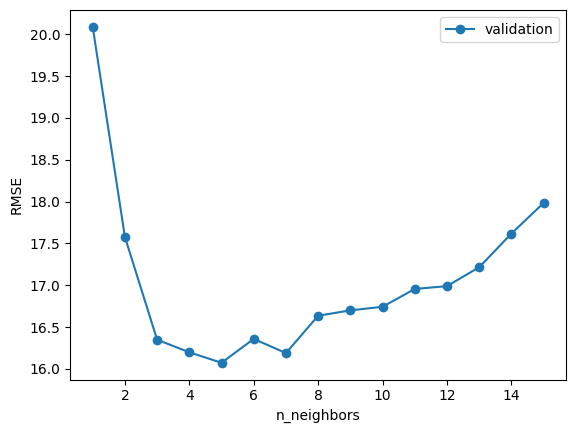

In [11]:
my_results.plot(x='n_neighbors',
                style='o-',
                ylabel='RMSE')


In [12]:
my_search.best_params_

{'n_neighbors': 5}

In [13]:
(-my_search.best_score_)**0.5

16.07308308943869

In [14]:
my_model = my_search.best_estimator_
y_ = my_model.predict(X)
mean_squared_error(y_, y)**0.5

13.087184571174962

In [34]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.neighbors import KNeighborsRegressor

my_data = sm.datasets.get_rdataset('cars', 'datasets').data
X, y = my_data[['speed']], my_data['dist']

def my_loocv(k):
  my_model = KNeighborsRegressor(n_neighbors=k)
  my_scores = cross_val_score(estimator=my_model,
                              X=X,
                              y=y,
                              cv=LeaveOneOut(),
                              scoring='neg_mean_squared_error')
  y_ = my_model.fit(X, y).predict(X)
  return pd.Series([k,
                    (-my_scores.mean())**0.5,        # RMSE(検証)
                    mean_squared_error(y_, y)**0.5], # RMSE(検証)
                    index=['n_neighbors', 'validation', 'training']
                   )
  
my_results = pd.Series(range(1, 16)).apply(my_loocv)

In [35]:
my_results.head()

,n_neighbors,validation,training
0,1.0,20.089798,18.715769
1,2.0,17.577685,15.145131
2,3.0,16.348836,12.768712
3,4.0,16.198804,12.435735
4,5.0,16.073083,13.087185


<Axes: xlabel='n_neighbors', ylabel='RMSE'>

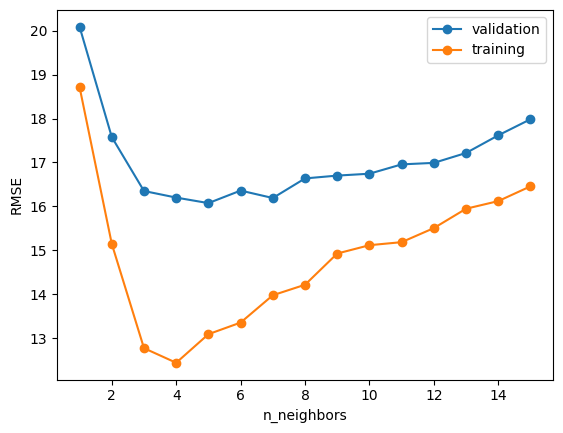

In [36]:
my_results.plot(x='n_neighbors',
                style='o-',
                ylabel='RMSE')